# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# list of cities url to get the API

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:

# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
print("Started")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
      # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
        
print("Completed")

Started
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | aleksandrov gay
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | rundu
Processing Record 10 of Set 1 | joshimath
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | vardo
Processing Record 14 of Set 1 | toliary
City not found. Skipping...
Processing Record 15 of Set 1 | mackay
Processing Record 16 of Set 1 | aklavik
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | paita
Processing Record 19 of Set 1 | komsomolskiy
Processing Record 20 of Set 1 | bandar-e lengeh
Processing Record 21 of Set 1 | bilma
Processing Record 22 of Set 1 | new norfolk
Processing Record 23 of Set 1 | georgetown
Processing Record 24 of Set 1

Processing Record 40 of Set 4 | iralaya
Processing Record 41 of Set 4 | vestmannaeyjar
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | furano
Processing Record 44 of Set 4 | riyadh
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | soure
Processing Record 48 of Set 4 | hasaki
Processing Record 49 of Set 4 | turayf
Processing Record 50 of Set 4 | valdosta
Processing Record 1 of Set 5 | irmo
Processing Record 2 of Set 5 | lufilufi
Processing Record 3 of Set 5 | ajdabiya
Processing Record 4 of Set 5 | port macquarie
Processing Record 5 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 5 | znamenskoye
Processing Record 7 of Set 5 | sterlibashevo
Processing Record 8 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 5 | hami
Processing Record 10 of Set 5 | puerto leguizamo
Processing Record 11 of Set 5 | grindavik
Processing Record 12 of Set 5 | robe

Processing Record 30 of Set 8 | gummidipundi
Processing Record 31 of Set 8 | adrar
Processing Record 32 of Set 8 | jalu
Processing Record 33 of Set 8 | adilabad
Processing Record 34 of Set 8 | praxedis guerrero
Processing Record 35 of Set 8 | alice springs
Processing Record 36 of Set 8 | haines junction
Processing Record 37 of Set 8 | mvuma
Processing Record 38 of Set 8 | chincha alta
Processing Record 39 of Set 8 | sitka
Processing Record 40 of Set 8 | tambura
Processing Record 41 of Set 8 | bogorodskoye
Processing Record 42 of Set 8 | yining
Processing Record 43 of Set 8 | bogo
Processing Record 44 of Set 8 | college
Processing Record 45 of Set 8 | ust-nera
Processing Record 46 of Set 8 | alyangula
Processing Record 47 of Set 8 | cockburn town
Processing Record 48 of Set 8 | muli
Processing Record 49 of Set 8 | porangatu
Processing Record 50 of Set 8 | troitskoye
Processing Record 1 of Set 9 | xinmin
Processing Record 2 of Set 9 | puerto madryn
Processing Record 3 of Set 9 | bolshoy 

Processing Record 23 of Set 12 | the valley
Processing Record 24 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 25 of Set 12 | nuuk
Processing Record 26 of Set 12 | sao manuel
Processing Record 27 of Set 12 | tomohon
Processing Record 28 of Set 12 | ponta do sol
Processing Record 29 of Set 12 | srandakan
Processing Record 30 of Set 12 | tessalit
Processing Record 31 of Set 12 | shubarkuduk
Processing Record 32 of Set 12 | gurgan
City not found. Skipping...
Processing Record 33 of Set 12 | puerto escondido
Processing Record 34 of Set 12 | maniitsoq
Processing Record 35 of Set 12 | perth
Processing Record 36 of Set 12 | atherton
Processing Record 37 of Set 12 | el carmen
Processing Record 38 of Set 12 | temaraia
City not found. Skipping...
Processing Record 39 of Set 12 | erdenet
Processing Record 40 of Set 12 | carballo
Processing Record 41 of Set 12 | mbour
Processing Record 42 of Set 12 | farafangana
Processing Record 43 of Set 12 | oktyabrskoye
Processing Record 

In [6]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()
#weather_df.head()

City          570
Cloudiness    570
Country       570
Date          570
Humidity      570
Lat           570
Lng           570
Max Temp      570
Wind Speed    570
dtype: int64

In [24]:
# export the city data in to a csv fil
weather_df.to_csv(r'C:\Users\kahsay\Documents\Homework\API HW - Instructions\Instructions\python-api-challenge\output_data/my_weather_data.csv')


In [8]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lompoc,1,US,1581813289,72,34.64,-120.46,66.00,11.41
1,Nikolskoye,75,RU,1581813455,84,59.70,30.79,35.60,13.42
2,Kodiak,75,US,1581813456,75,57.79,-152.41,32.00,12.15
3,Vaini,20,TO,1581813456,66,-21.20,-175.20,84.20,10.29
4,Airai,0,TL,1581813456,69,-8.93,125.41,76.33,1.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

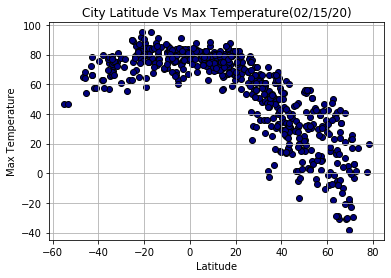

In [9]:
# Create a scatter plot for Latitude vs Temp
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker='o', c='navy', edgecolor='black')
plt.title("City Latitude Vs Max Temperature(%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
#plt.savefig('Images/temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

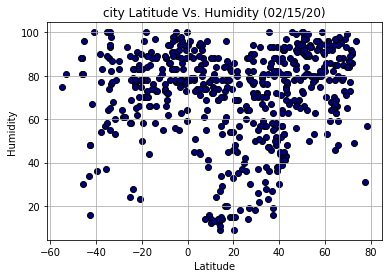

<Figure size 432x288 with 0 Axes>

In [10]:
#create a scatter plot Latitude Vs. Humidity
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker='o', color='navy', edgecolor='black')
plt.title("city Latitude Vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.show()
plt.savefig('scatplotlatitudemaxtemp')

#### Latitude vs. Cloudiness Plot

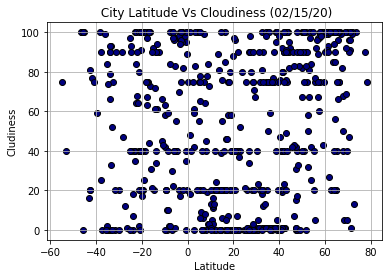

In [11]:
# create a scatter Latitude Vs Cloudiness 
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o', facecolor='navy', edgecolor='black')
plt.title(" City Latitude Vs Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cludiness')
plt.grid()
plt.savefig('')
plt.show()


#### Latitude vs. Wind Speed Plot

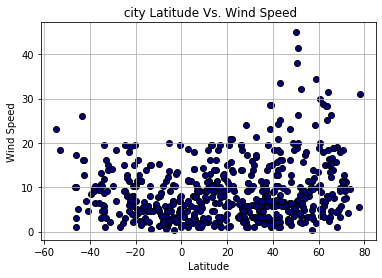

In [12]:
# Create a scatter plot of Latitude Vs wind Speed plot
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o', facecolor='navy',edgecolor='black')
plt.title( ' city Latitude Vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig('')
plt.show()

## Linear Regression

In [13]:
weather_df.columns

Index(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng',
       'Max Temp', 'Wind Speed'],
      dtype='object')

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
# use the function Y=mx + b
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()
    

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northlat_df = weather_df.loc[weather_df["Lat"] >= 0,:]
southlat_df = weather_df.loc[weather_df["Lat"] < 0,:]

northlat_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lompoc,1,US,1581813289,72,34.64,-120.46,66.00,11.41
1,Nikolskoye,75,RU,1581813455,84,59.70,30.79,35.60,13.42
2,Kodiak,75,US,1581813456,75,57.79,-152.41,32.00,12.15
5,Aleksandrov Gay,82,RU,1581813456,95,50.15,48.57,22.37,5.99
9,Joshimath,23,IN,1581813457,26,30.57,79.57,35.89,9.71


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
x_values = northlat_df["Lat"]
y_values = northlat_df["Max Temp"]

plot_linear_regration(x_values,y_values,'Max Temp',(6,30))

#plt.savefig('northerntemplat')

NameError: name 'plot_linear_regration' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4598421522988607


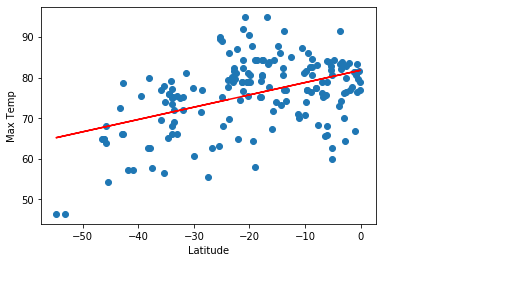

In [17]:
x_values = southlat_df["Lat"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

#plt.savefig('southerntemplat')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3124262712596757


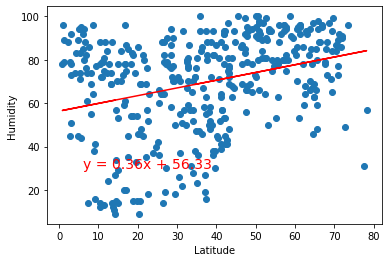

<Figure size 432x288 with 0 Axes>

In [18]:

x_values = northlat_df["Lat"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('northernhumlat')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.25371892725330963


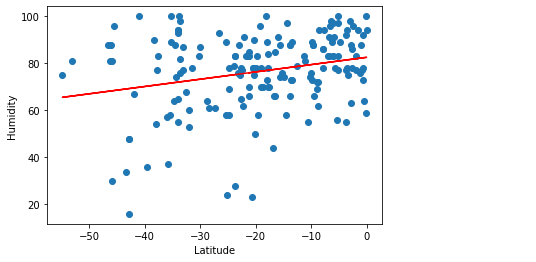

In [19]:
x_values = southlat_df["Lat"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

#plt.savefig('southernhumlat')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3935581189751448


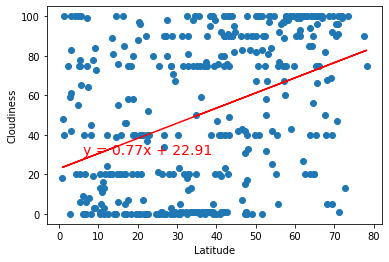

<Figure size 432x288 with 0 Axes>

In [20]:

x_values = northlat_df["Lat"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('northernwindlat')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0701434326828596


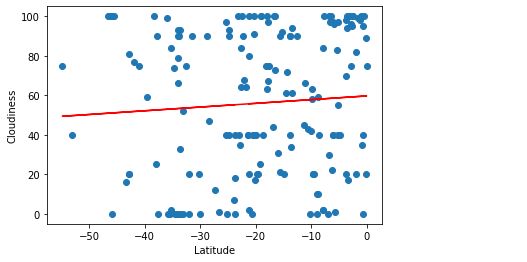

<Figure size 432x288 with 0 Axes>

In [21]:

x_values = southlat_df["Lat"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('southernCloudiness')


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20682931878190783


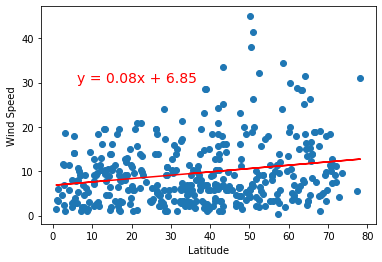

<Figure size 432x288 with 0 Axes>

In [22]:

x_values = northlat_df["Lat"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('southernwindlat')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3166008016095776


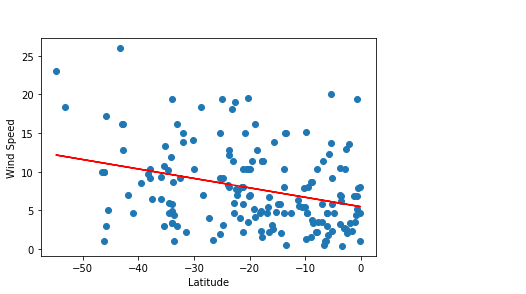

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = southlat_df["Lat"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('C:/Users/kahsay/Documents/Homework/API HW - Instructions/Instructions/Images/southernwindlat.png', transparent=True, bbox_inches='tight')


